# System tools to herd the dumps into something useful

In [20]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


/home/xcite/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'array', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Making a new analysis directory

In [29]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-07-28-h12m52


## Reformat the dump

In [67]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.phsp
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.header

In [9]:
# !touch depositions2.txt

In [3]:
!cat *.csv | awk 'NR % 6 == 0' > deposition2.txt

2.073042869567871
2.132049083709717
4.022275447845459
1.902695655822754
1.07391345500946
1.774478912353516
3.529087066650391
5.216781139373779
6.72601318359375
6.296572208404541
3.44815731048584
3.725526809692383
4.201964855194092
7.032387733459473
4.913443565368652
4.839405059814453
4.543158054351807
2.928437471389771
2.706029415130615
4.203657150268555
5.560772895812988
3.707059144973755
1.586710810661316
3.066277980804443
4.822726726531982
4.090524673461914
4.3293776512146
5.509234428405762
3.727136135101318
3.665156126022339
4.765800952911377
5.466709613800049
6.540939331054688
6.306503295898438
4.59081506729126
8.503451347351074
4.635594844818115
5.3511962890625
7.314949989318848
12.65203380584717
9.318163871765137
8.635822296142578
7.485219478607178
3.936932563781738
9.173104286193848
6.436376571655273
4.280623435974121
1.712247133255005
4.024499416351318
3.919838666915894
3.163702249526978
3.186211824417114
2.910125970840454
7.390393733978271
3.130936145782471
4.403591632843018


In [8]:
!ls *.csv | grep -o '[0-9][0-9]*' > energies.txt

In [14]:
#!cat energies.txt deposition.txt
#!cat deposition.txt

In [5]:
energies = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

In [6]:
with open('deposition.txt') as f:
    array = np.array([[x for x in line.split()] for line in f]).flatten()
    deposition = array.astype(np.float)

In [7]:
deposition_summed = np.array([sum(deposition[ii:ii-625:-1]) for ii in range(deposition.size,0,-625)])

In [31]:
np.save(f'analysis/{dt_string}/EnergyDeposition.npy',[deposition_summed[-2::-1],energies])

In [19]:
(deposition_summed[-2::-1]/(energies/1000))/1000000

array([0.07984198, 0.08586997, 0.08833256, 0.08955016, 0.08667728,
       0.0869398 , 0.08779452, 0.08860768, 0.06819135, 0.04583335,
       0.03724209, 0.03302917, 0.03158913, 0.02466797, 0.02187205,
       0.02132834])

<IPython.core.display.Javascript object>


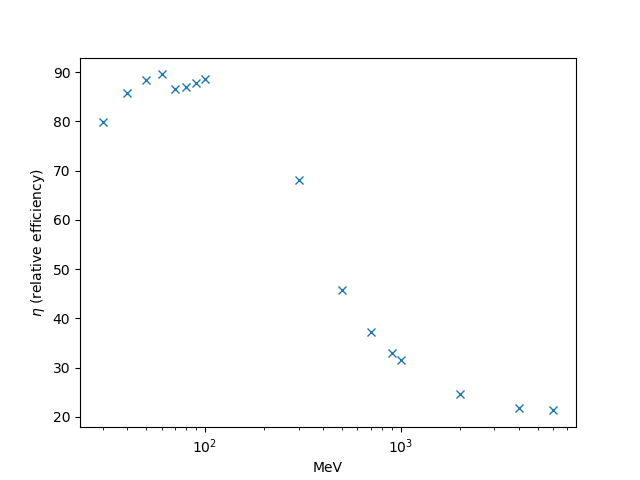

NameError: name 'dt_string' is not defined

In [12]:
plt.figure()
plt.semilogx(energies,deposition_summed[-2::-1]/energies,'x')
plt.xlabel('MeV')
plt.ylabel('$\eta$ (relative efficiency)')
# plt.savefig(f'analysis/{dt_string}/EnergyDeposition.png')
plt.title('CWO efficiency')

In [27]:
np.mean(np.diff(np.linspace(-0.98,0.98,51)))

0.0392

<IPython.core.display.Javascript object>


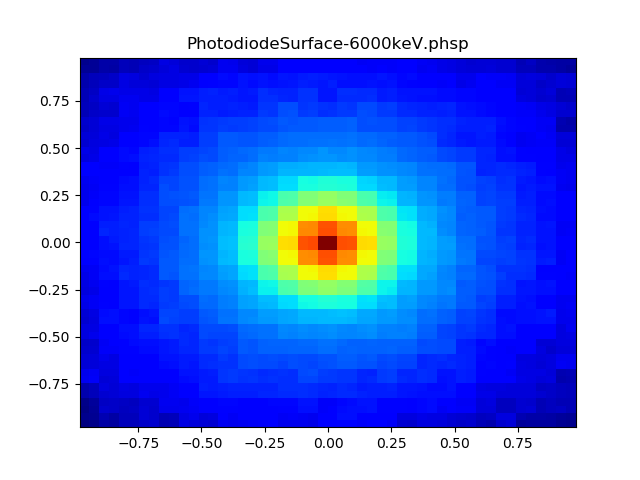

PhotodiodeSurface-0030keV.phsp
PhotodiodeSurface-0040keV.phsp
PhotodiodeSurface-0050keV.phsp
PhotodiodeSurface-0060keV.phsp
PhotodiodeSurface-0070keV.phsp
PhotodiodeSurface-0080keV.phsp
PhotodiodeSurface-0090keV.phsp
PhotodiodeSurface-0100keV.phsp
PhotodiodeSurface-0300keV.phsp
PhotodiodeSurface-0500keV.phsp
PhotodiodeSurface-0700keV.phsp
PhotodiodeSurface-0900keV.phsp
PhotodiodeSurface-1000keV.phsp
PhotodiodeSurface-2000keV.phsp
PhotodiodeSurface-4000keV.phsp
PhotodiodeSurface-6000keV.phsp


In [3]:
rootdir = "."
regex = re.compile('(.*phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

xedges = np.linspace(-0.98,0.98,51)
yedges = np.linspace(-0.98,0.98,51)

for root, dirs, files in os.walk(rootdir):
    for file in sorted(files):
        if regex.match(file):
            
            print(file)
            
            y = read_ntuple(file)

            h,xs,yx,ima = plt.hist2d(y['Local position X [cm]'],y['Local position Y [cm]'], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm())
            plt.title(f'{file}')
            plt.savefig(f'analysis/{dt_string}/{file}.png')
            
            np.save(f'analysis/{dt_string}/{file}',h)
            
            del h,xs,yx,ima

<IPython.core.display.Javascript object>


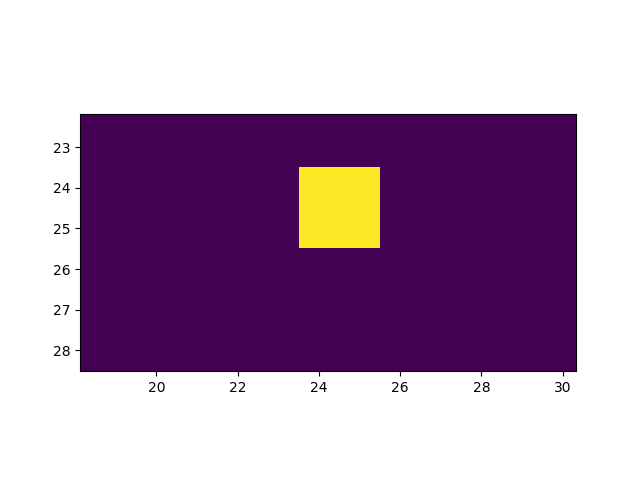

In [22]:
plt.figure()
plt.imshow(np.load('analysis/2020-06-06-h10m44/PhotodiodeSurface-0050keV.phsp.npy'))

<IPython.core.display.Javascript object>


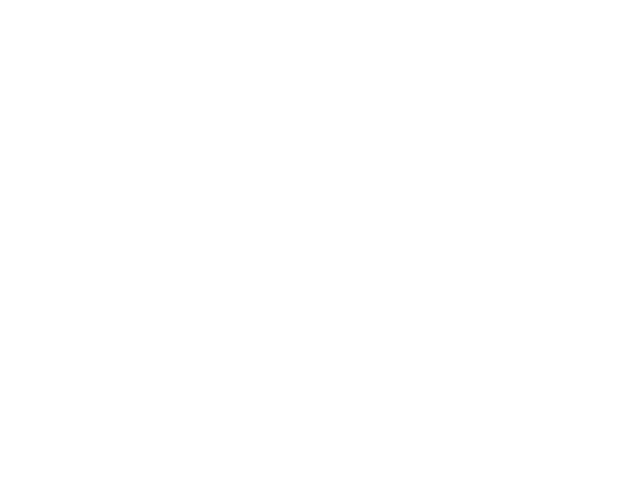

PhotodiodeSurface-6000keV.phsp


In [20]:
rootdir = "."
regex = re.compile('(.*phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

xedges = np.linspace(-1.5876,1.5876,82)
yedges = np.linspace(-1.5876,1.5876,82)

n = 0
for root, dirs, files in os.walk(rootdir):
    for file in sorted(files,reverse=True):
        if regex.match(file):
            
            print(file)
            
            y = read_ntuple(file)
            
            for ii in range(10000):
                
                xx = [y[kk][0] for kk in range(n,n+10000)]
                yy = [y[kk][1] for kk in range(n,n+10000)]
                
                if ii == 0:
                    h,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                else:
                    h2,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                    
                    h += h2

    #             plt.title(f'{file}')
    #             plt.savefig(f'analysis/{dt_string}/{file}.png')

#                 np.save(f'analysis/{dt_string}/{file}',h)

                n += 10000
            
            break

In [64]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-04-h08m58/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [19]:
xx = np.array([y[kk][0] for kk in range(y.size)])
yy = np.array([y[kk][1] for kk in range(y.size)])

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


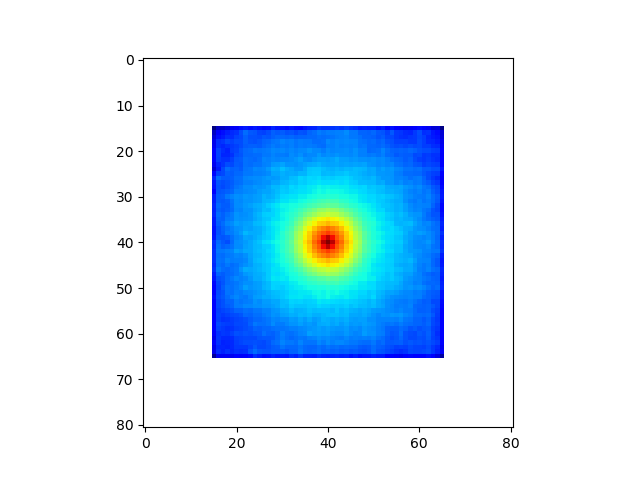

In [21]:
file = 'PhotodiodeSurface-6000keV.phsp'

plt.figure()
plt.imshow(h, cmap=cm.jet, norm=LogNorm())
plt.savefig(f'analysis/{dt_string}/{file}.png')

np.save(f'analysis/{dt_string}/{file}',h)

In [14]:
file

'EnergyDeposition.png'

In [37]:
im = np.load('analysis/2020-06-06-h10m44/PhotodiodeSurface-0030keV.phsp.npy')

<IPython.core.display.Javascript object>


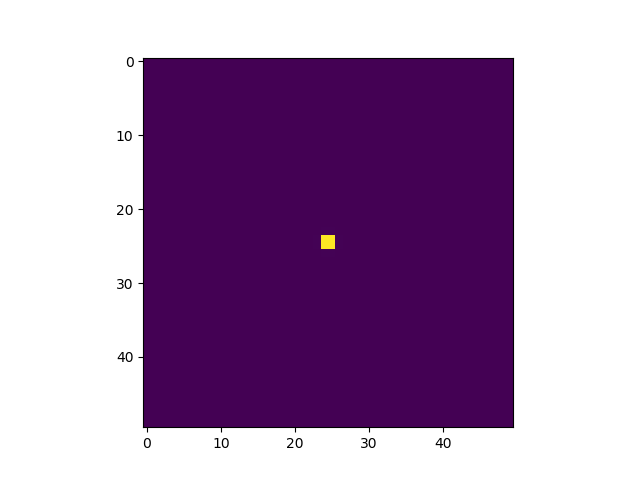

In [38]:
plt.figure()
plt.imshow(im)